In [1]:
file_path_train = r"C:\Users\drumm\Documents\kaggle\liverpool-ion-switching\train.csv"
file_path_test = r"C:\Users\drumm\Documents\kaggle\liverpool-ion-switching\test.csv"
file_path_sample = r"C:\Users\drumm\Documents\kaggle\liverpool-ion-switching\sample_submission.csv"

In [2]:
import pandas as pd
train = pd.read_csv(file_path_train)
test = pd.read_csv(file_path_test)

In [3]:
sample = pd.read_csv(file_path_sample)

In [4]:
train_batch1 = train.loc[0:5e5-1]
train_batch2 = train.loc[5e5:1e6-1]
train_batch3 = train.loc[1e6:1.5e6-1]
train_batch4 = train.loc[1.5e6:2e6-1]
train_batch5 = train.loc[2e6:2.5e6-1]
train_batch6 = train.loc[2.5e6:3e6-1]
train_batch7 = train.loc[3e6:3.5e6-1]
train_batch8 = train.loc[3.5e6:4e6-1]
train_batch9 = train.loc[4e6:4.5e6-1]
train_batch10 = train.loc[4.5e6:5e6-1]

In [5]:
test_batch1 = test.loc[0:5e5-1]
test_batch2 = test.loc[5e5:1e6-1]
test_batch3 = test.loc[1e6:1.5e6-1]
test_batch4 = test.loc[1.5e6:2e6-1]

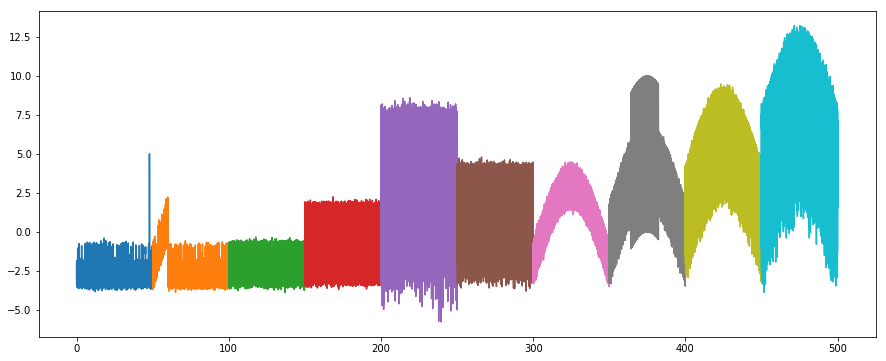

In [68]:
from matplotlib import pyplot as pp
pp.figure(figsize=(15,6))
pp.plot(train_batch1.time,train_batch1.signal)
pp.plot(train_batch2.time,train_batch2.signal)
pp.plot(train_batch3.time,train_batch3.signal)
pp.plot(train_batch4.time,train_batch4.signal)
pp.plot(train_batch5.time,train_batch5.signal)
pp.plot(train_batch6.time,train_batch6.signal)
pp.plot(train_batch7.time,train_batch7.signal)
pp.plot(train_batch8.time,train_batch8.signal)
pp.plot(train_batch9.time,train_batch9.signal)
pp.plot(train_batch10.time,train_batch10.signal)

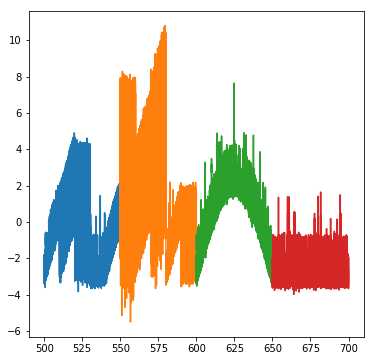

In [33]:
pp.figure(figsize=(15*4/10,6))
pp.plot(test_batch1.time,test_batch1.signal)
pp.plot(test_batch2.time,test_batch2.signal)
pp.plot(test_batch3.time,test_batch3.signal)
pp.plot(test_batch4.time,test_batch4.signal)

In [34]:
# test_batch1 = train_batch7?
# test_batch2 = train_batch8?
# test_batch3 = train_batch7
# test_batch4 = train_batch3

In [6]:
x7 = train_batch7.drop(["open_channels"],axis=1)
x8 = train_batch8.drop(["open_channels"],axis=1)
x3 = train_batch3.drop(["open_channels"],axis=1)
y7 = train_batch7.open_channels
y8 = train_batch8.open_channels
y3 = train_batch3.open_channels

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf_7_model = RandomForestRegressor()
rf_7_model.fit(x7,y7)
rf_8_model = RandomForestRegressor()
rf_8_model.fit(x8,y8)
rf_3_model = RandomForestRegressor()
rf_3_model.fit(x3,y3)

predictions1 = rf_7_model.predict(test_batch1)
predictions2 = rf_8_model.predict(test_batch2)
predictions3 = rf_7_model.predict(test_batch3)
predictions4 = rf_3_model.predict(test_batch4)

C:\Users\drumm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\drumm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\drumm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
preds1list = list(predictions1)
preds2list = list(predictions2)
preds3list = list(predictions3)
preds4list = list(predictions4)

In [13]:
predictions = preds1list + preds2list + preds3list + preds4list

len(predictions)

2000000

In [45]:
#test_batch1 = all ones
#test_batch2 = all twos
#test_batch3 = all ones
#test_batch4 = all ones

In [100]:
predictions = ones + twos + ones + ones

In [14]:
output = pd.DataFrame({'time':sample.time,'open_channels':predictions})
output.to_csv('submission.csv',index=False,float_format='%.4f')